# **Outliers**

In [1]:
%load_ext autoreload
%autoreload 2

# -----------------------------------------------------------------------
import pandas as pd

import sys
sys.path.append("../../../")
from src import funciones_outliers as fo


In [2]:
df = pd.read_pickle("../../../datos/cluster_1/df_nonulls_encoded.pkl")
df.head()

Profit     Country     Market   Category  Sub-Category  Quantity  \
0  762.1845   41.307011  41.307011  65.454958     42.154896         7   
1 -288.7650   58.931116  68.495338  28.878567     40.884178         9   
2  919.9710   58.931116  68.495338  65.454958     64.556749         9   
3  -96.5400   95.389328  62.481031  65.454958     64.556749         5   
4  311.5200  112.486133  39.164447  65.454958    116.314687         8   

   Discount  Shipping Cost  Ship Mode_First Class  Ship Mode_Same Day  \
0       0.0         933.57                    0.0                 1.0   
1       0.1         923.63                    0.0                 0.0   
2       0.1         915.49                    1.0                 0.0   
3       0.1         910.16                    1.0                 0.0   
4       0.0         903.04                    0.0                 1.0   

   Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Consumer  \
0                     0.0                       0.0               1.0   
1                     1.0                       0.0               0.0   
2                     0.0                       0.0               1.0   
3                     0.0                       0.0               0.0   
4                     0.0                       0.0               1.0   

   Segment_Corporate  Segment_Home Office  Order Priority_Critical  \
0                0.0                  0.0                      1.0   
1                1.0                  0.0                      1.0   
2                0.0                  0.0                      0.0   
3                0.0                  1.0                      0.0   
4                0.0                  0.0                      1.0   

   Order Priority_High  Order Priority_Low  Order Priority_Medium  
0                  0.0                 0.0                    0.0  
1                  0.0                 0.0                    0.0  
2                  0.0                 0.0                    1.0  
3                  0.0                 0.0                    1.0  
4                  0.0                 0.0                    0.0

In [3]:
df.describe().T[:1]

count       mean         std       min    25%   50%     75%  \
Profit  20017.0  47.408875  241.838082 -6599.978 -5.404  21.9  83.733   

             max  
Profit  8399.976

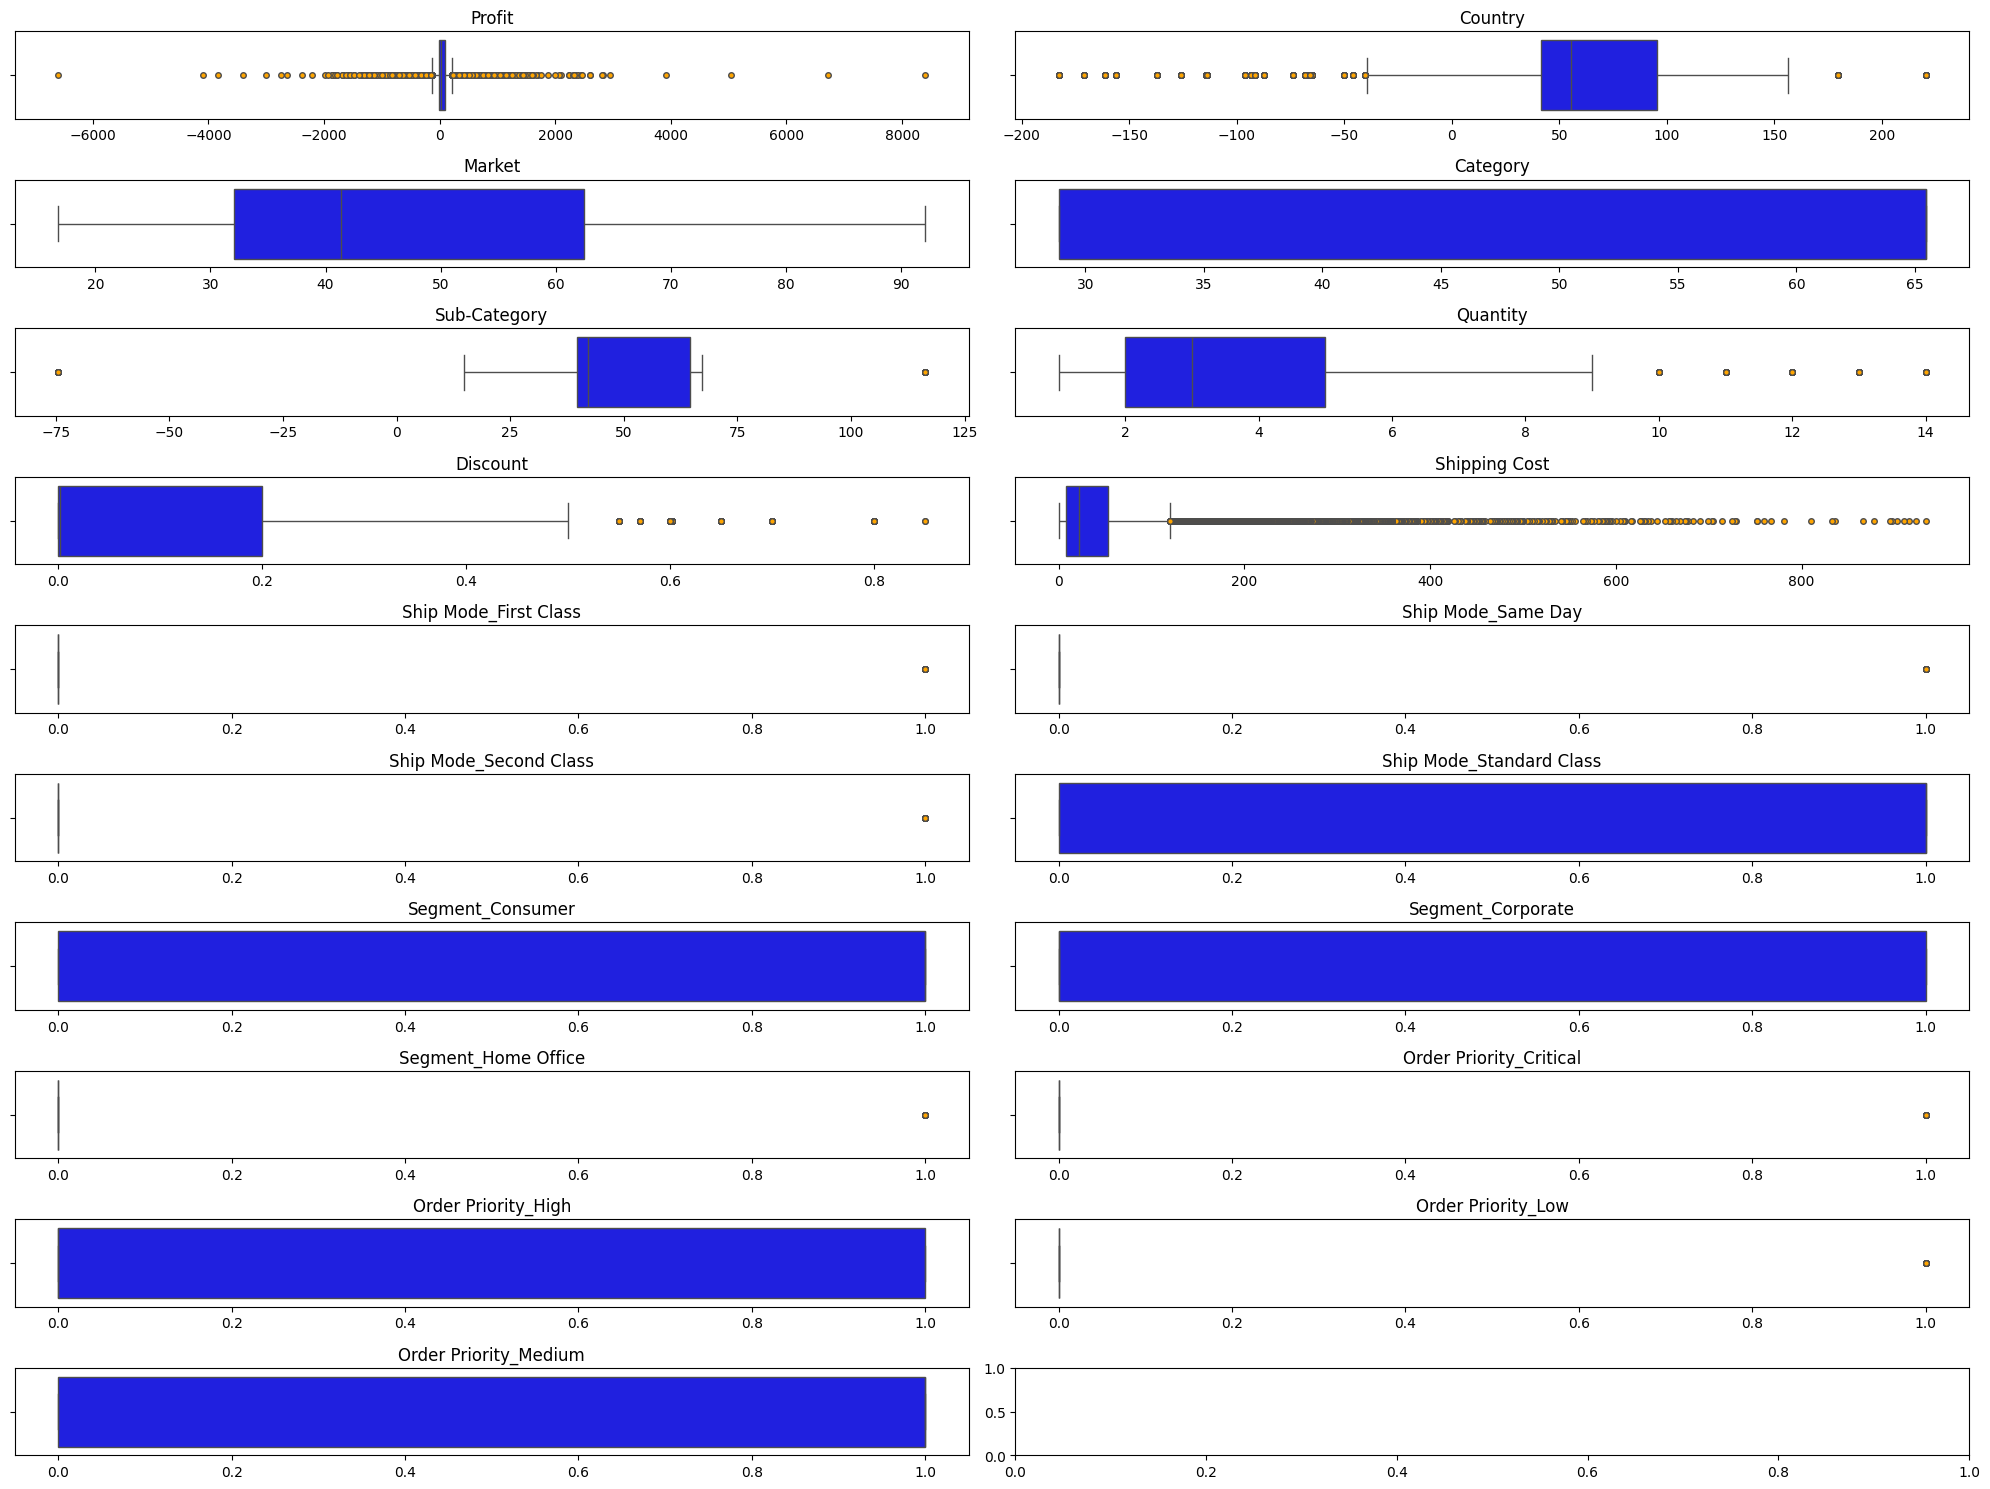

In [4]:
univariados = fo.GestionOutliersUnivariados(df)
univariados.visualizar_outliers_univariados()

Como vimos en el EDA es complicado entender los outliers univariados, por lo que vamos a observar los multivariados, usaremos el algoritmo IFO pues los outliers que observamos en su mayoría no están aisaldos si no que aparecen más agrupados.

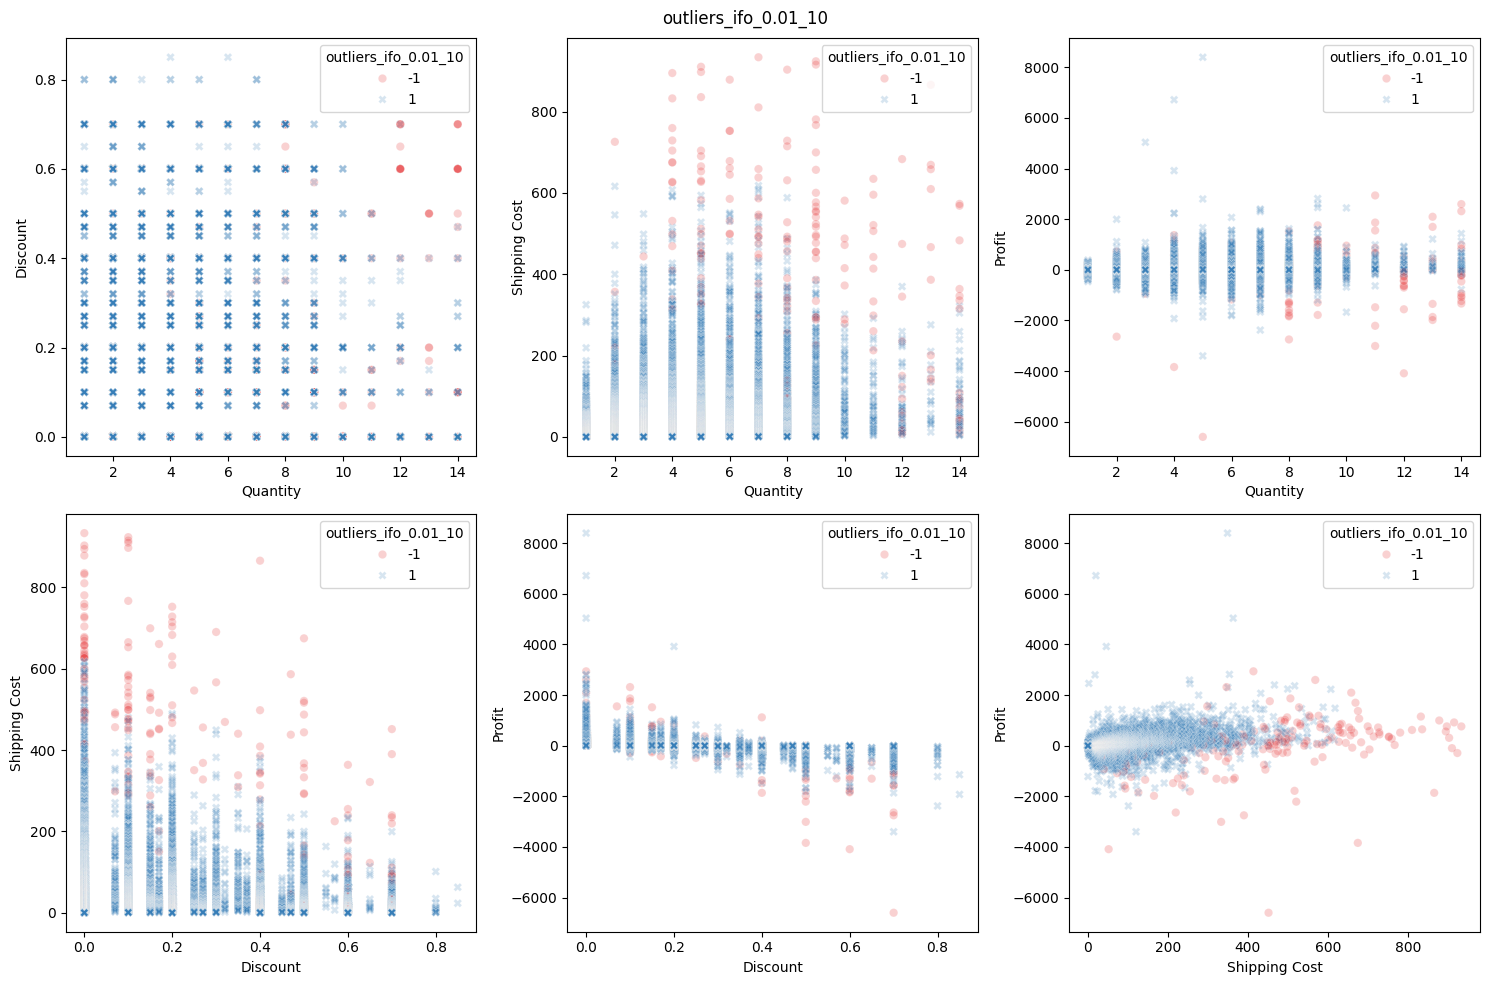

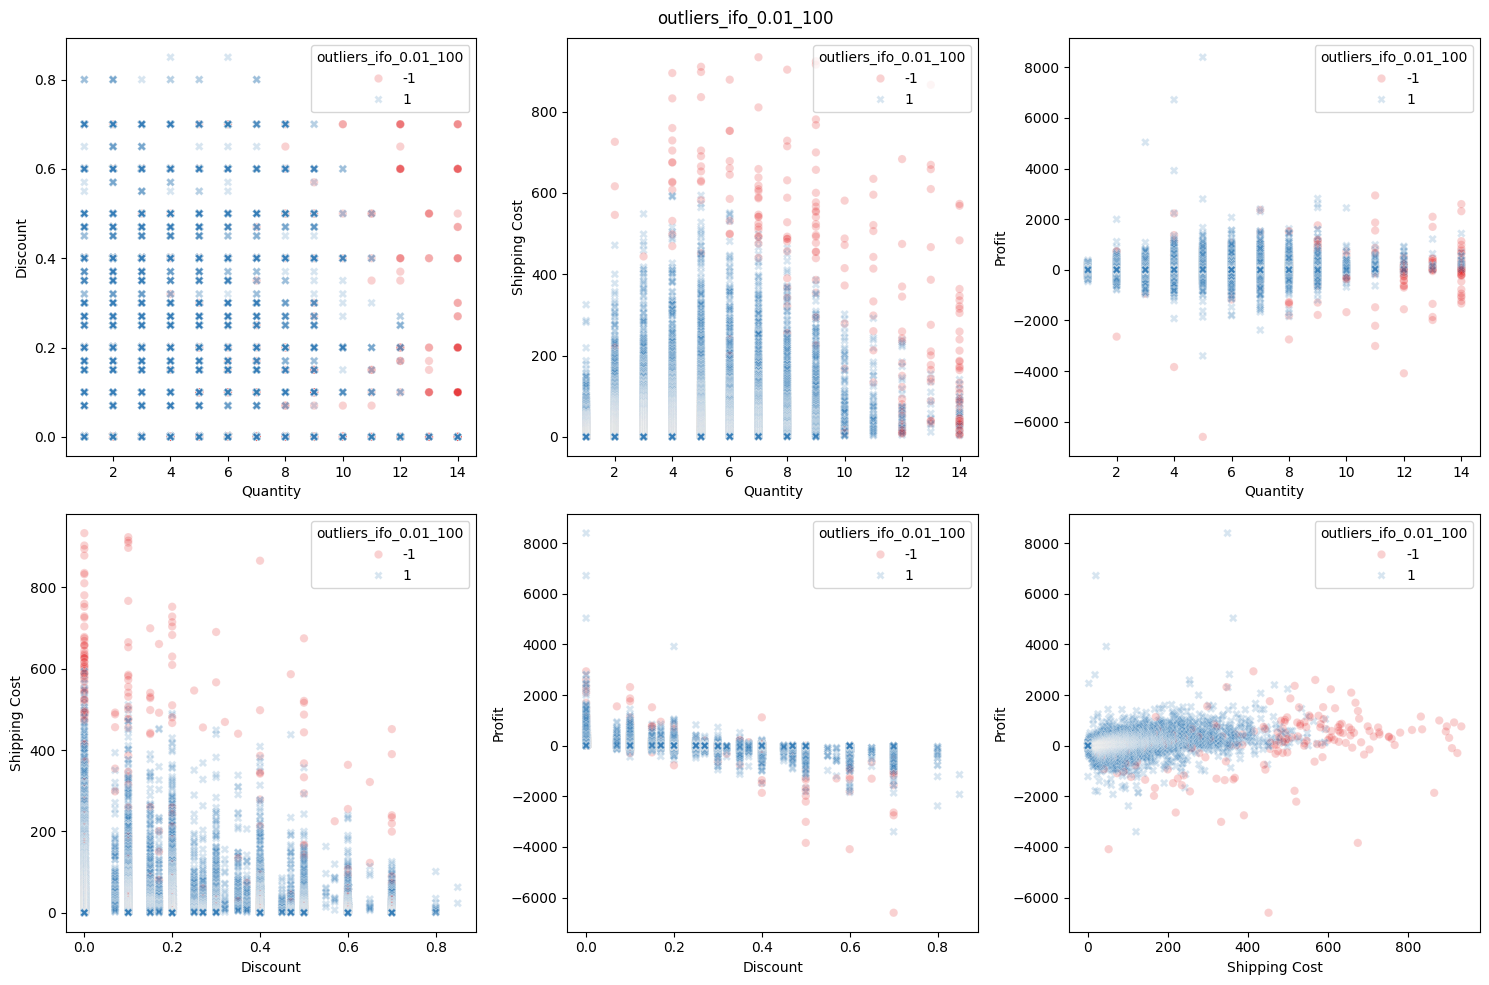

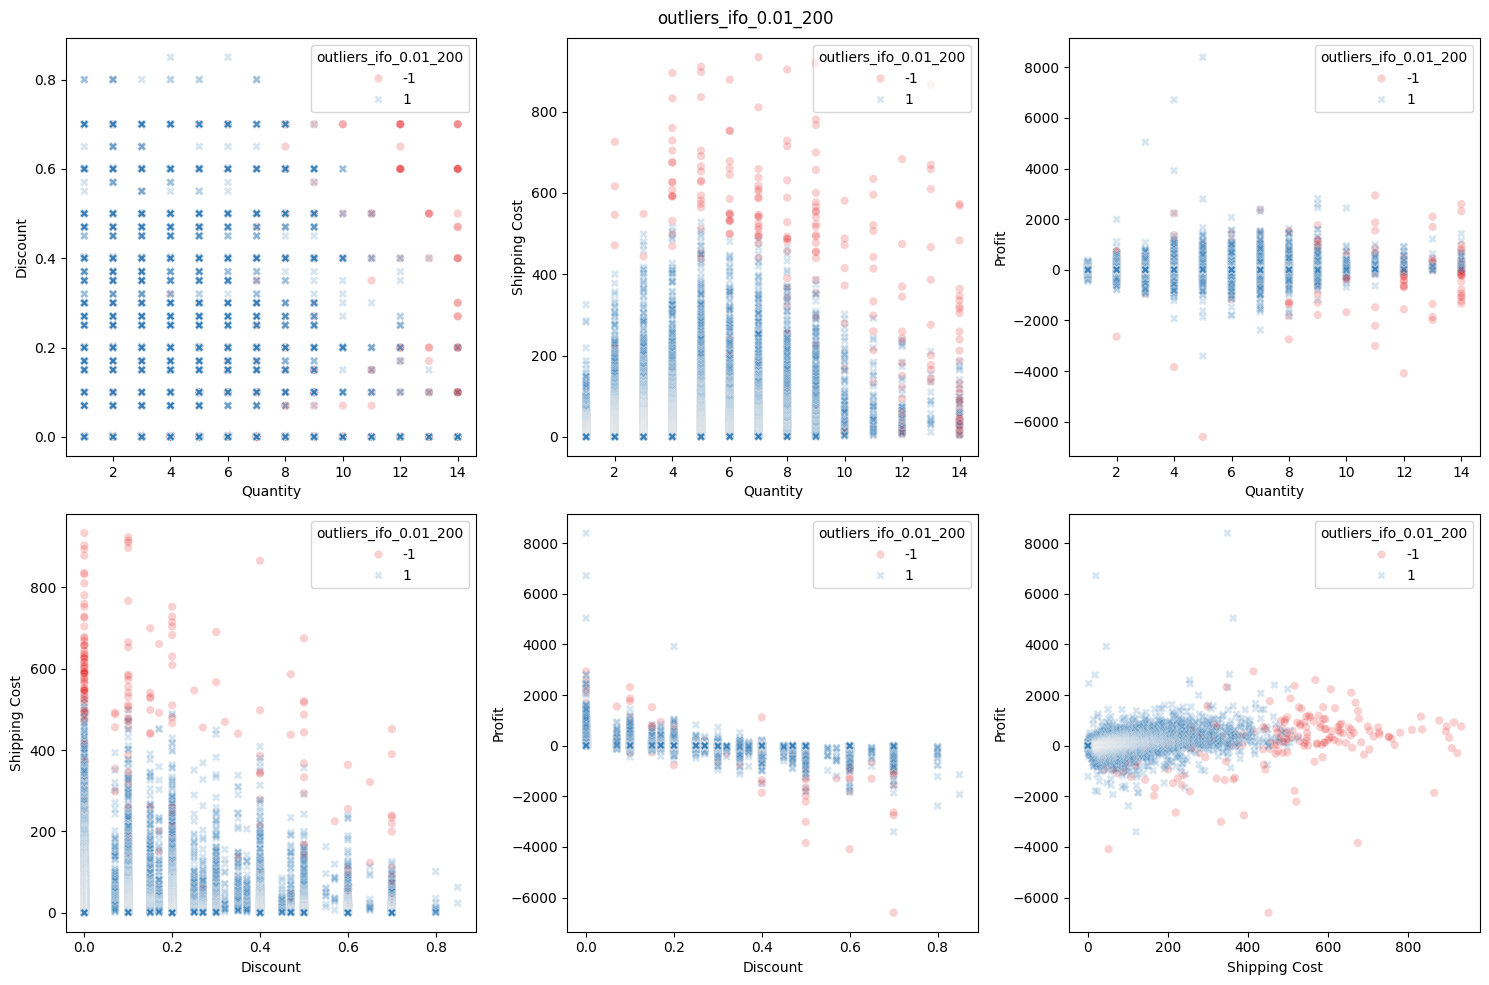

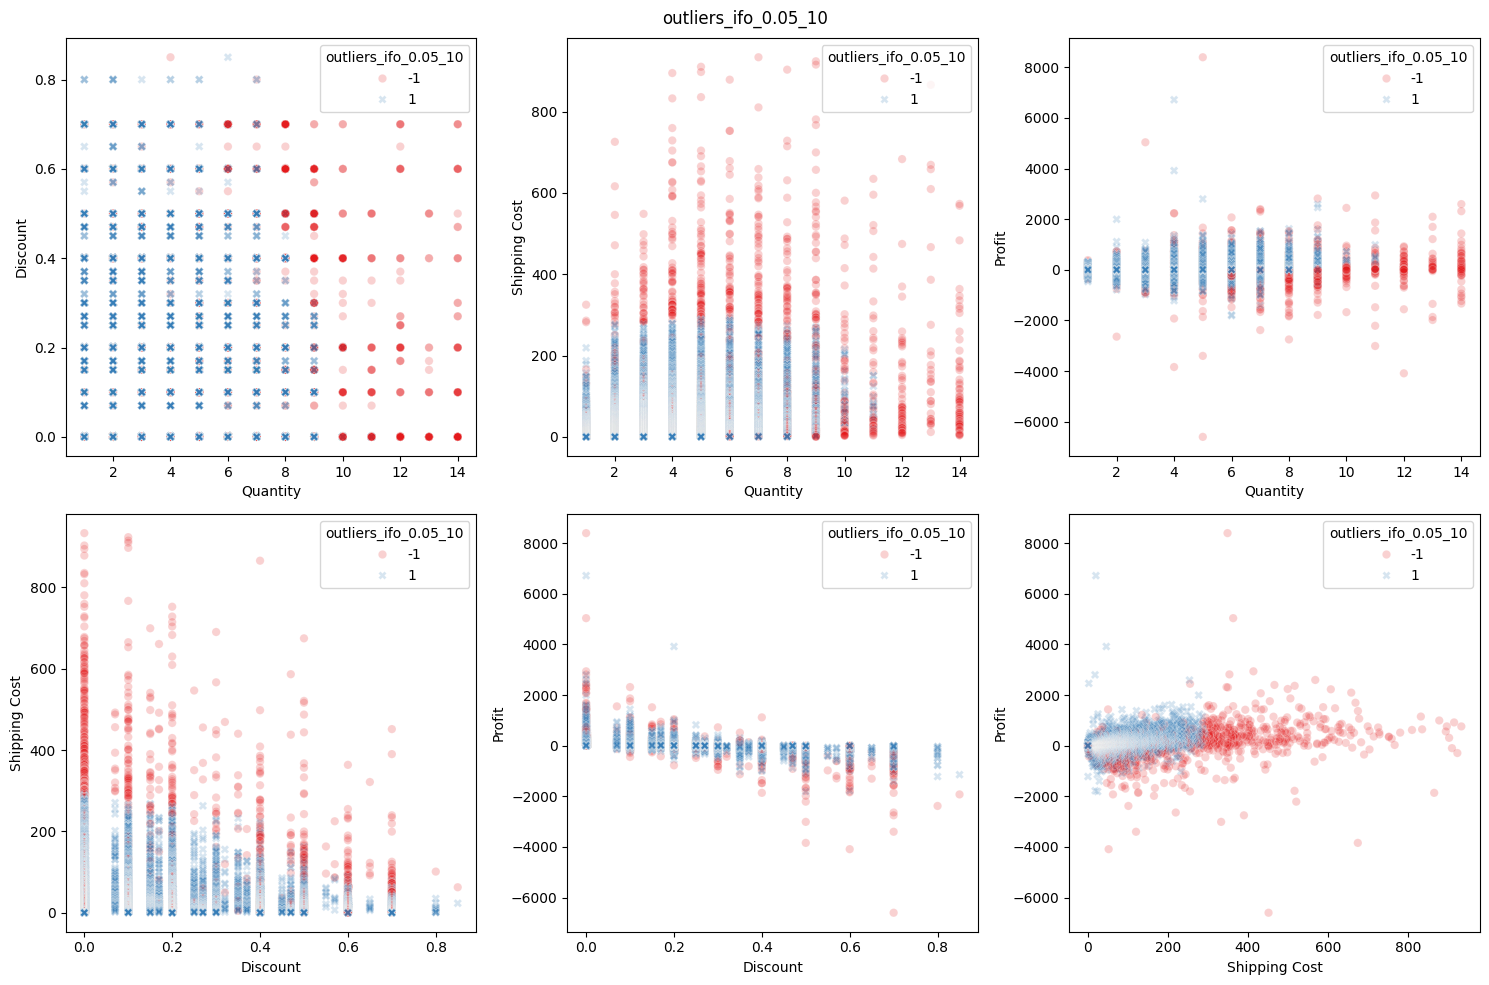

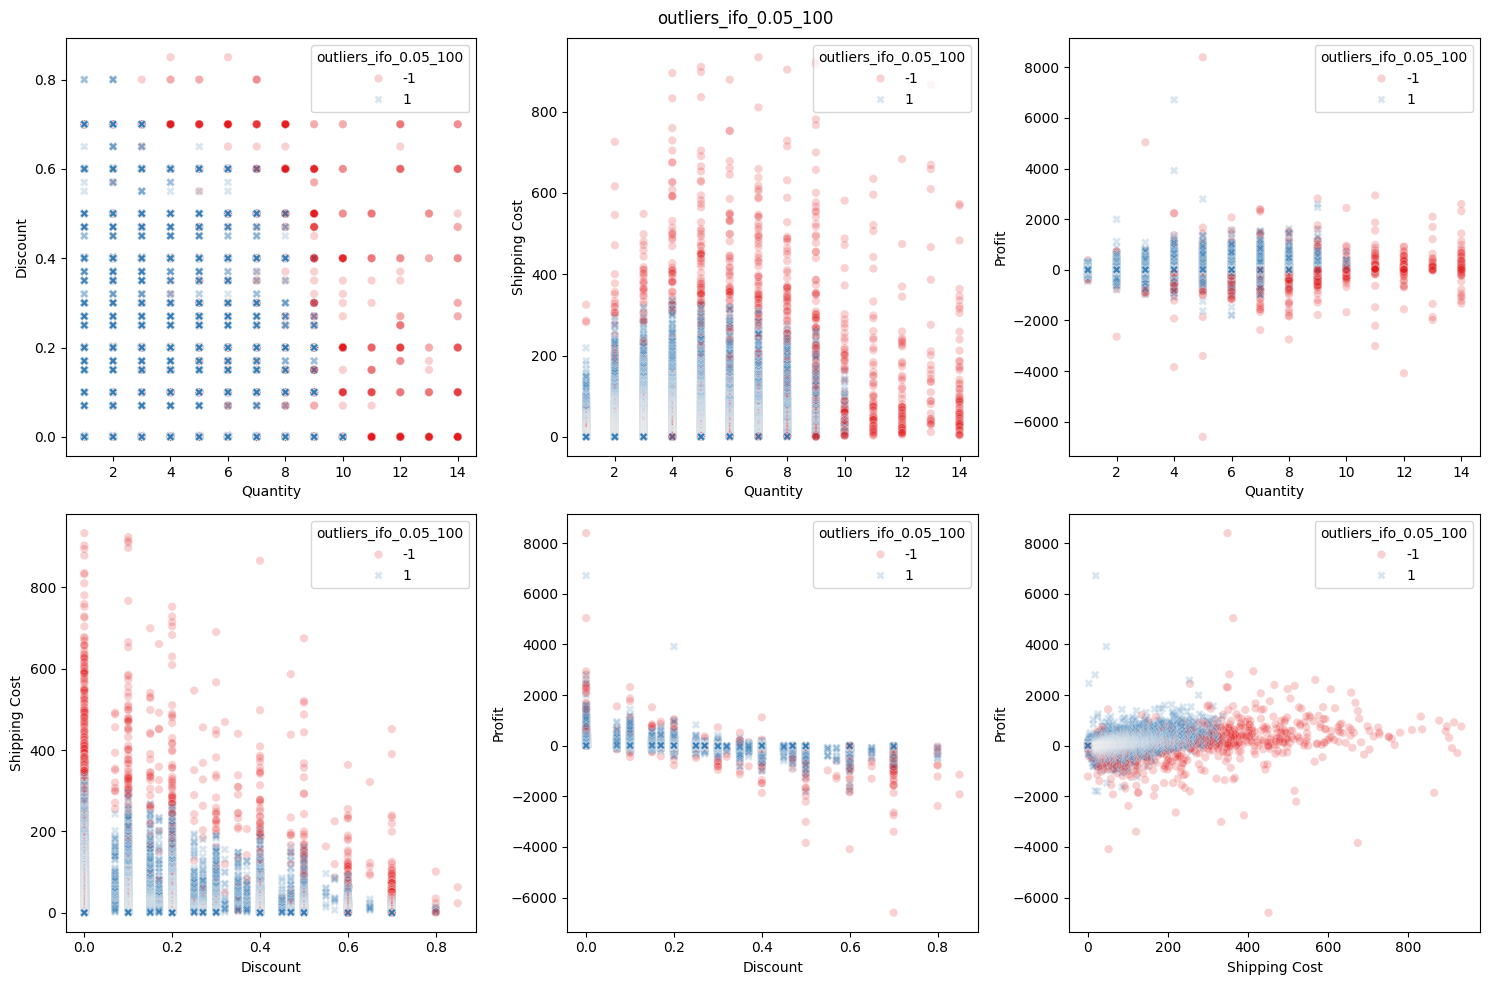

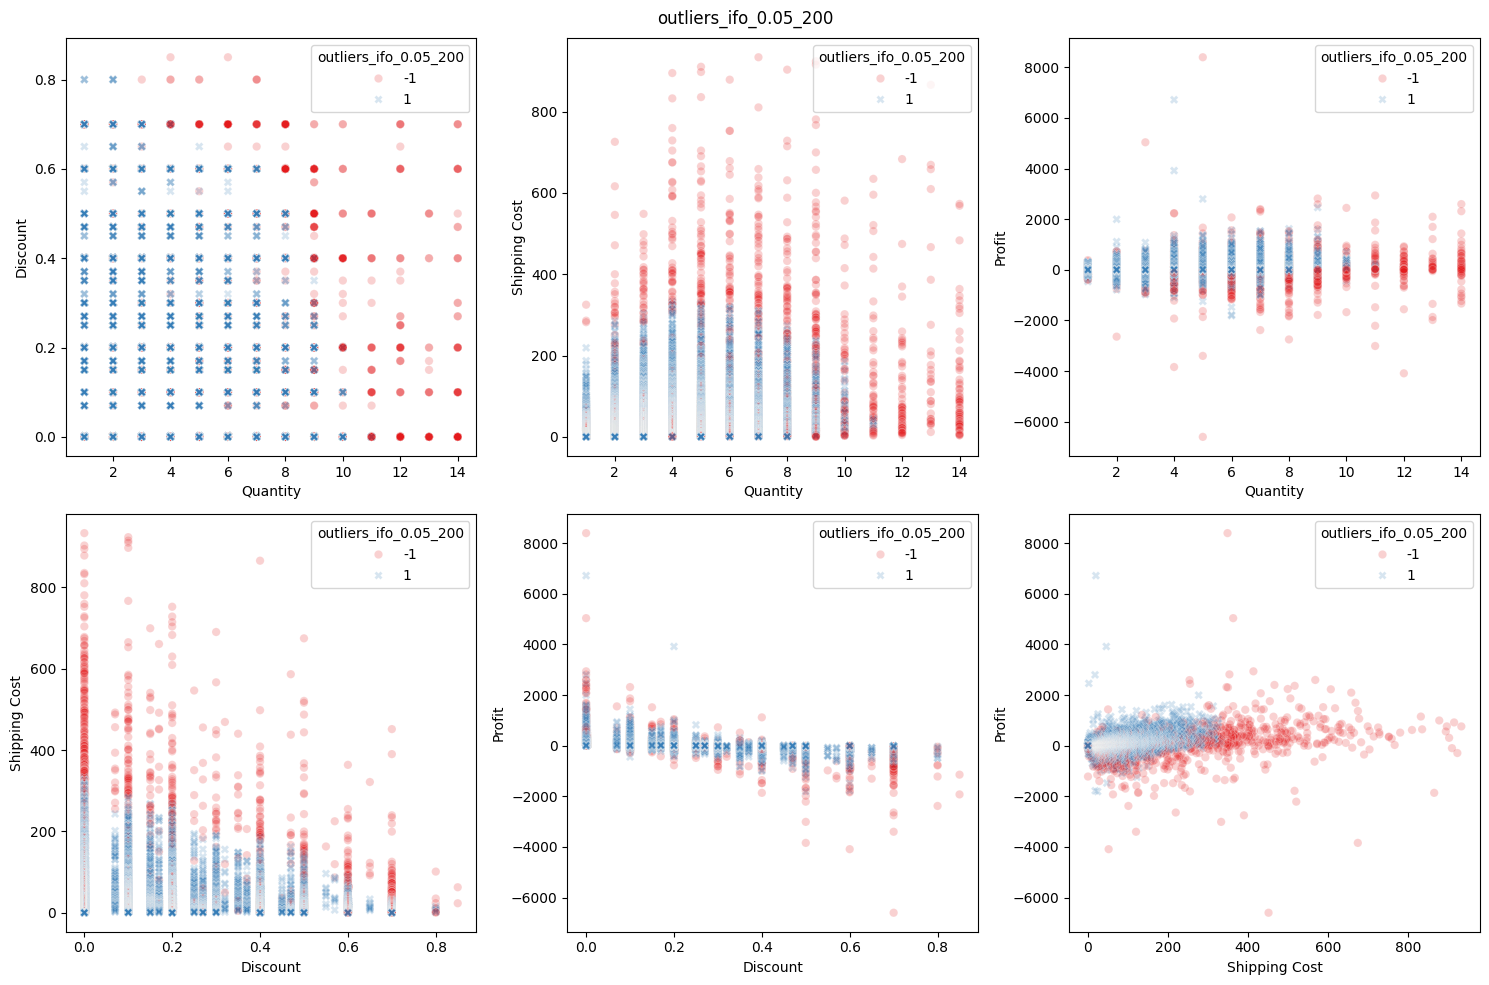

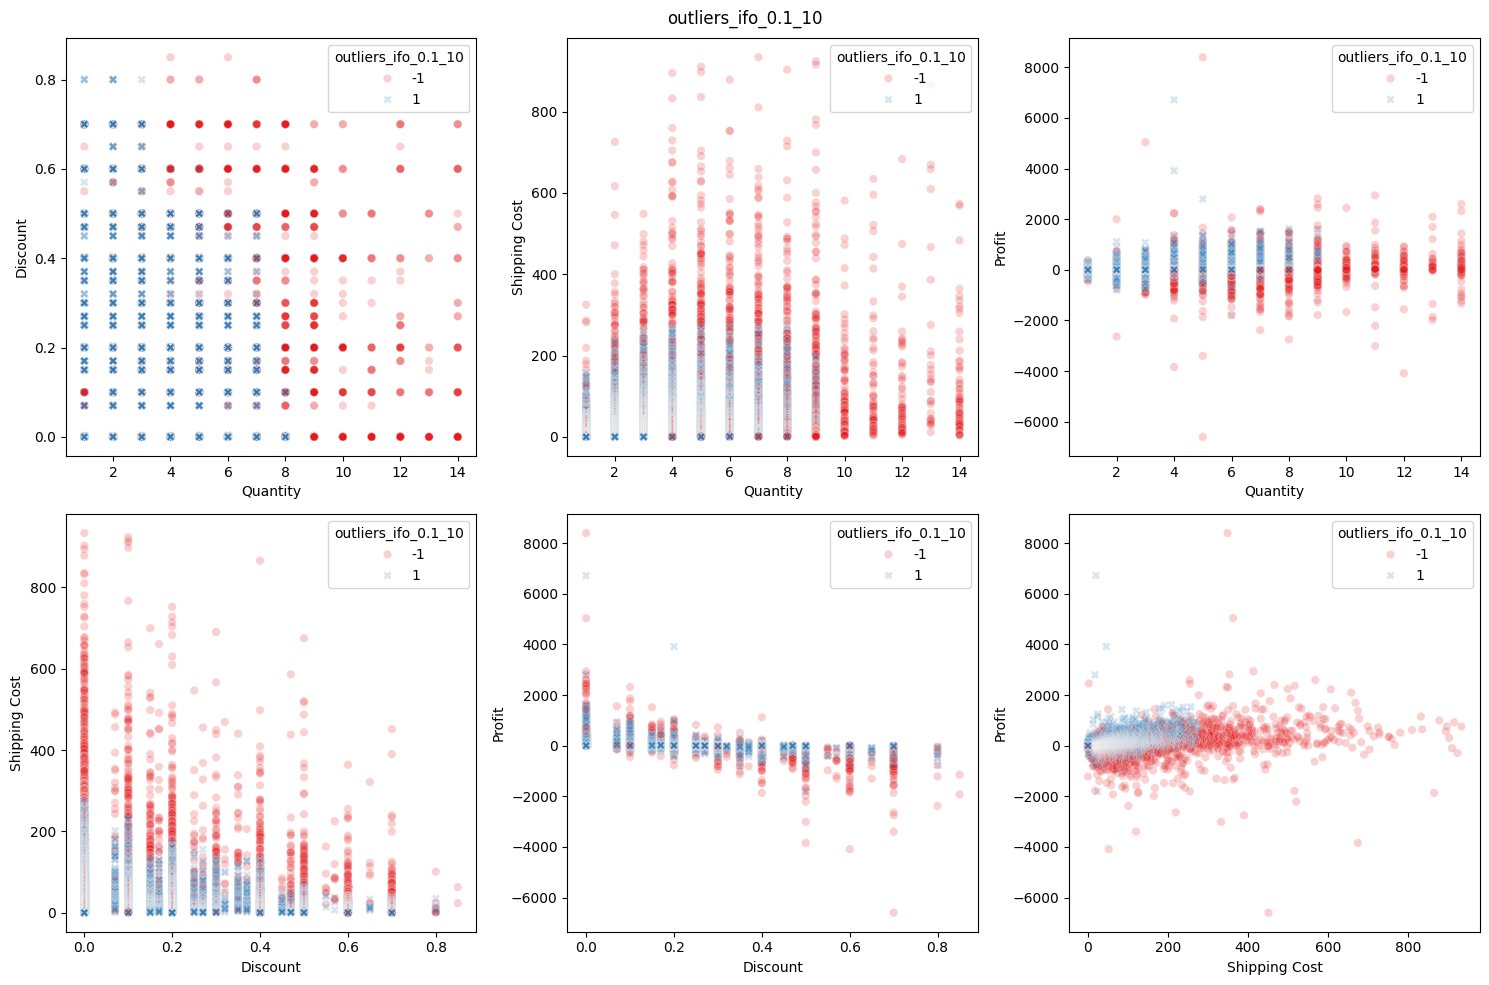

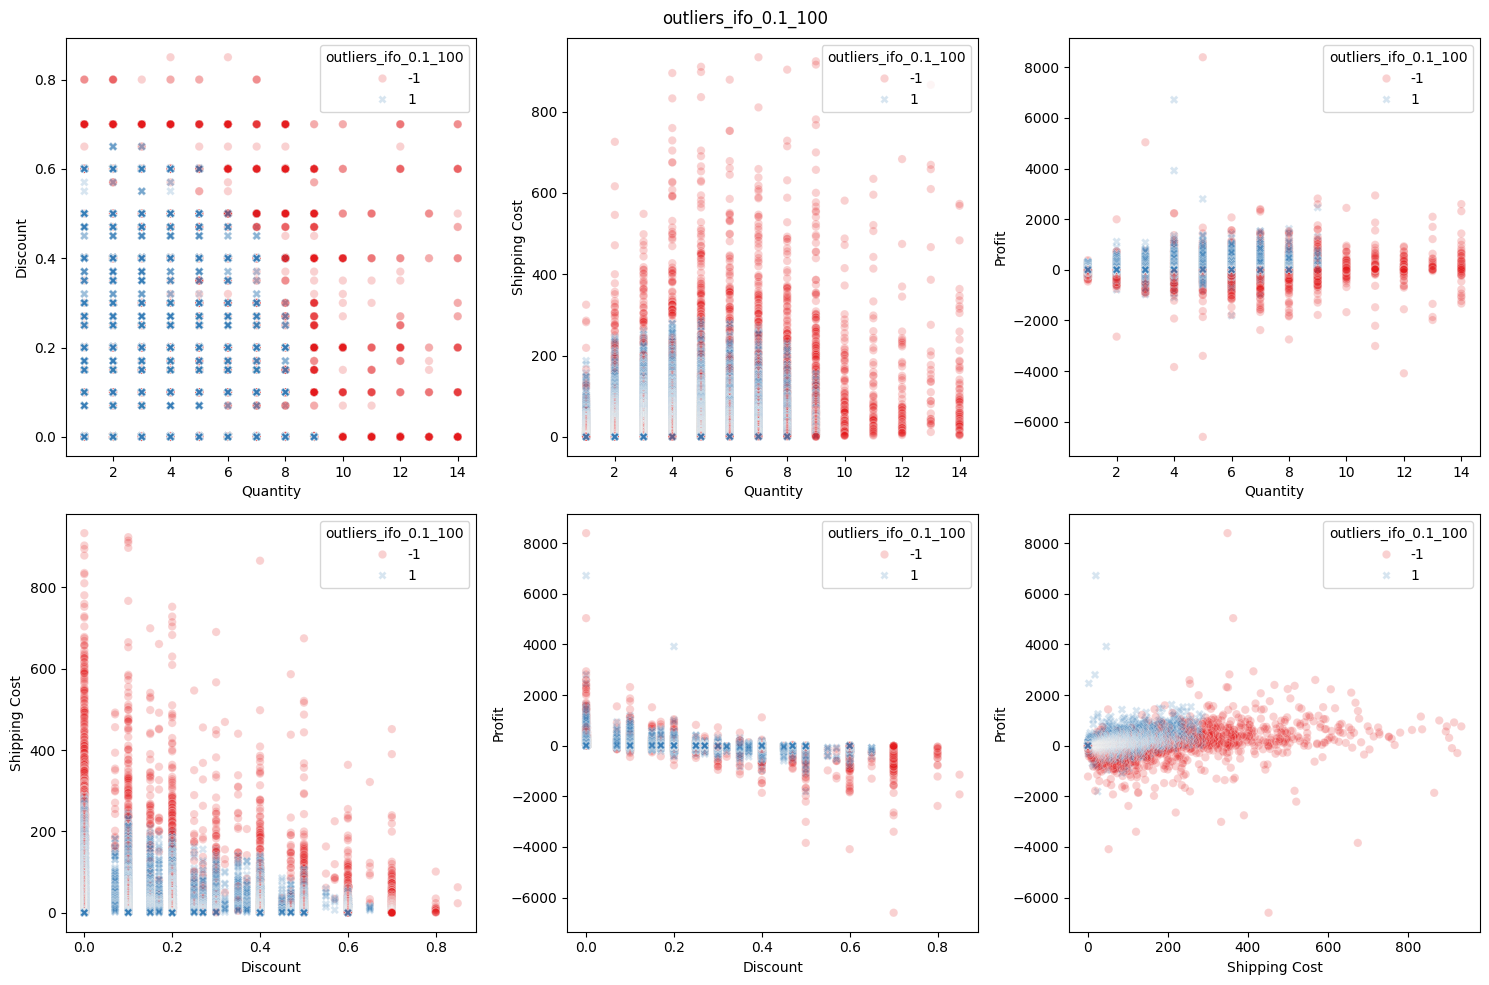

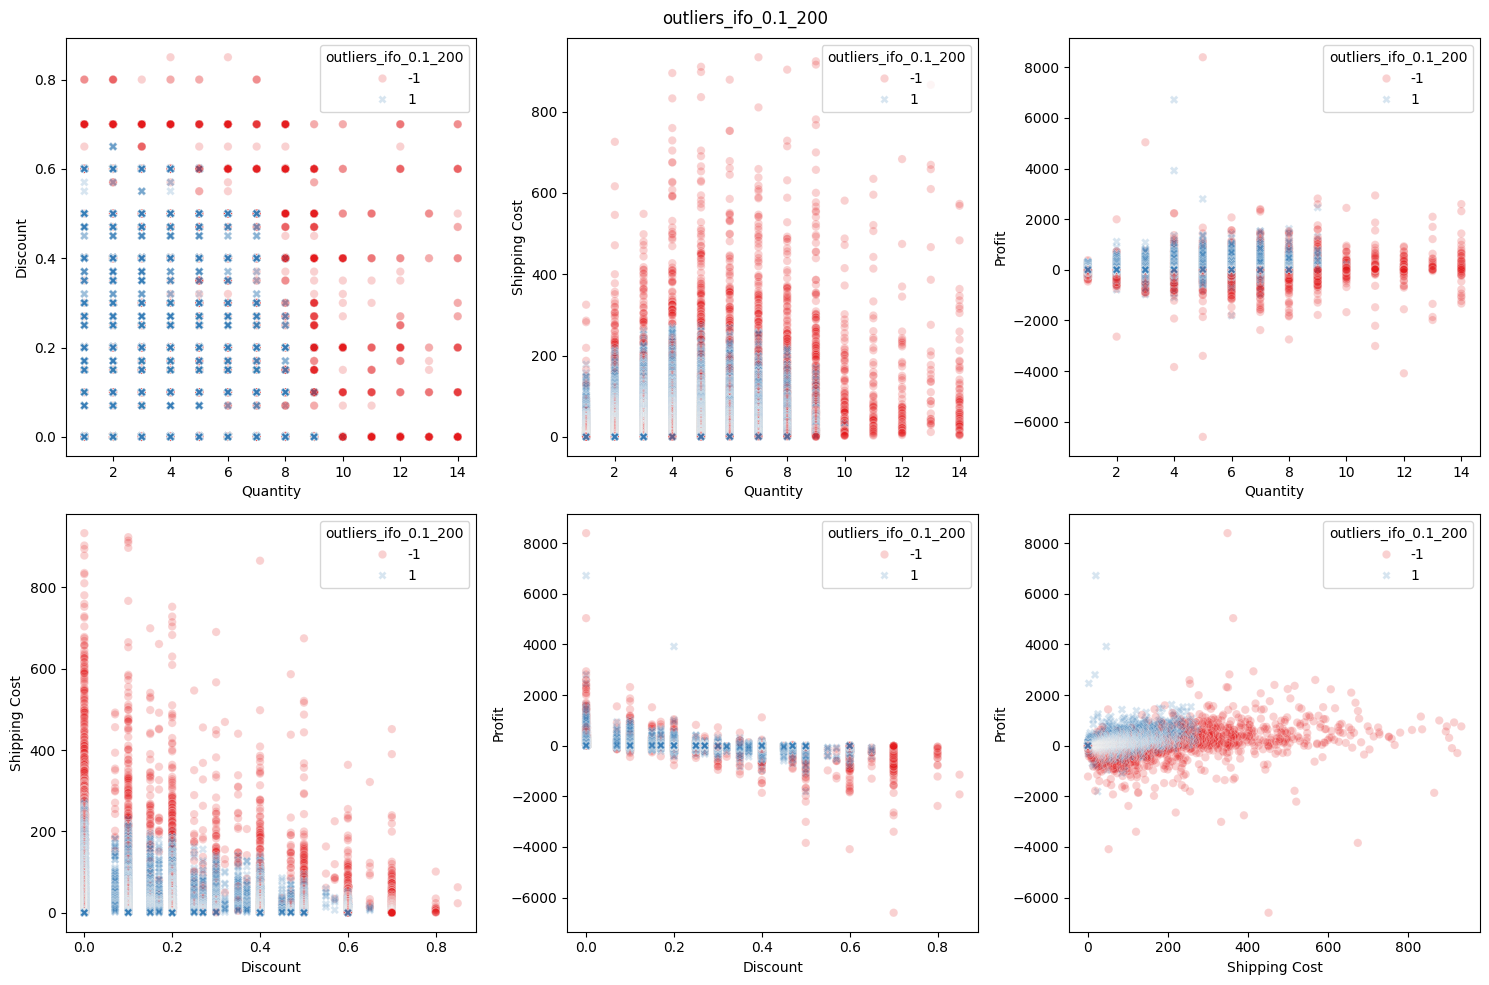

In [5]:
multi = fo.GestionOutliersMultivariados(df)

contaminacion = [0.01, 0.05, 0.1]
estimadores = [10, 100, 200]
cols = ['Quantity', 'Discount', 'Shipping Cost']
vr = "Profit"
df_outliers = multi.detectar_outliers_if(cols, vr, contaminacion, estimadores)

Como observando las gráficas vemos un gran cantidad de outliers vamos a probar a fltrarlos por aquellos registros en los que en el 60% de las veces han dado positivo como outlier.

In [6]:
df_outliers["porcentaje_outliers"] = df_outliers.filter(like="outliers").apply(lambda x: round(sum(x==-1)/len(x),2), axis=1)
df_outliers.sample(5)

Profit     Country     Market   Category  Sub-Category  Quantity  \
3359    53.1600  132.874175  39.164447  65.454958    116.314687         2   
15378  -15.9840   55.675397  32.081321  28.878567     14.816223         3   
469    359.3025   56.876470  62.481031  65.454958     39.614989         9   
18545    4.9500   41.307011  41.307011  65.454958     42.154896         3   
17582   16.5900   72.618362  16.760150  28.878567     14.816223         1   

       Discount  Shipping Cost  Ship Mode_First Class  Ship Mode_Same Day  \
3359       0.00          76.99                    0.0                 0.0   
15378      0.40           7.70                    1.0                 0.0   
469        0.15         263.82                    1.0                 0.0   
18545      0.00           2.58                    0.0                 0.0   
17582      0.00           3.97                    0.0                 0.0   

       ...  outliers_ifo_0.01_10  outliers_ifo_0.01_100  \
3359   ...                     1                      1   
15378  ...                     1                      1   
469    ...                     1                      1   
18545  ...                     1                      1   
17582  ...                     1                      1   

       outliers_ifo_0.01_200  outliers_ifo_0.05_10  outliers_ifo_0.05_100  \
3359                       1                     1                      1   
15378                      1                     1                      1   
469                        1                    -1                     -1   
18545                      1                     1                      1   
17582                      1                     1                      1   

       outliers_ifo_0.05_200  outliers_ifo_0.1_10  outliers_ifo_0.1_100  \
3359                       1                    1                     1   
15378                      1                    1                     1   
469                       -1                   -1                    -1   
18545                      1                    1                     1   
17582                      1                    1                     1   

       outliers_ifo_0.1_200  porcentaje_outliers  
3359                      1                 0.00  
15378                     1                 0.00  
469                      -1                 0.67  
18545                     1                 0.00  
17582                     1                 0.00  

[5 rows x 29 columns]

In [12]:
porcentaje = 0.6
df_outliers_porcentaje = df_outliers[df_outliers["porcentaje_outliers"]>porcentaje]
df_restante = df_outliers[df_outliers["porcentaje_outliers"]<porcentaje]

print(f"Tenemos un {round(df_outliers_porcentaje.shape[0]/df_outliers.shape[0]*100, 2)}% de outliers respecto al total de los datos.")

Tenemos un 4.09% de outliers respecto al total de los datos.


Como primera aproximación vmos a probar a quitar estos outliers y quedarnos con el resto del dataframe, en próximas iteraciones podemos probar a mantenerlos o imputarlos.

In [13]:
df_final = df_restante.loc[:, ~df_restante.columns.str.contains("outlier")]
print(df_final.shape)
df_final.head(2)

(19198, 19)


Profit     Country     Market   Category  Sub-Category  Quantity  \
277  1172.88  132.874175  39.164447  65.454958     64.556749         4   
283   355.44  100.498744  32.081321  28.878567     40.884178         4   

     Discount  Shipping Cost  Ship Mode_First Class  Ship Mode_Same Day  \
277       0.0         336.65                    1.0                 0.0   
283       0.0         333.15                    1.0                 0.0   

     Ship Mode_Second Class  Ship Mode_Standard Class  Segment_Consumer  \
277                     0.0                       0.0               1.0   
283                     0.0                       0.0               0.0   

     Segment_Corporate  Segment_Home Office  Order Priority_Critical  \
277                0.0                  0.0                      0.0   
283                1.0                  0.0                      0.0   

     Order Priority_High  Order Priority_Low  Order Priority_Medium  
277                  0.0                 0.0                    1.0  
283                  1.0                 0.0                    0.0

In [14]:
df_final.describe().T[:1]

count      mean         std        min      25%      50%    75%  \
Profit  19198.0  47.18096  178.661134 -1811.0784 -3.51375  21.8787  80.04   

              max  
Profit  6719.9808

Como podemos observar dentro de ese 4% se encontraban los valores más extremos dejando ahora el rango del profit entre -1800 y 6700.

In [16]:
df_final.to_pickle("../../../datos/cluster_1/df_nonulls_encoded_sinout.pkl")